In [74]:
import os
import json
from collections import defaultdict
import operator
import pandas as pd
import numpy as np
%matplotlib inline

In [184]:
n_tags = 100

In [172]:
tags = defaultdict(int)
for root, subdirs, files in os.walk("data"):
    for file in files:
        with open(os.path.join(root, file)) as file_data:
            file_tags = json.load(file_data)['tags']
            for tag in file_tags:
                tags[tag[0]] = tags[tag[0]] + 1

In [173]:
sorted_tags = sorted(tags.items(), key=operator.itemgetter(1), reverse=True)

In [174]:
indexed_tags = [(t[1][0], t[0]) for t in enumerate(sorted_tags[:n_tags])]

In [175]:
song_vector = defaultdict(int)
for root, subdirs, files in os.walk("data"):
    for file in files:
        with open(os.path.join(root, file)) as file_data:
            file_data = json.load(file_data)
            vector = []
            file_tags = dict(file_data['tags'])
            for tag in indexed_tags:
                if tag[0] in file_tags:
                    vector.append(int(file_tags[tag[0]]))
                else:
                    vector.append(0)
            song_vector[file_data['track_id']] = vector

In [176]:
from sklearn.decomposition import PCA

In [177]:
model = PCA(n_components=2)
model.fit(list(song_vector.values()))

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [178]:
model.explained_variance_ratio_

array([ 0.21133445,  0.10267949])

In [179]:
component = {}
for title,pc in song_vector.items():
    component[title] = model.transform([pc]).flatten()


In [180]:
import pandas as pd

In [181]:
df = pd.DataFrame(component).transpose()

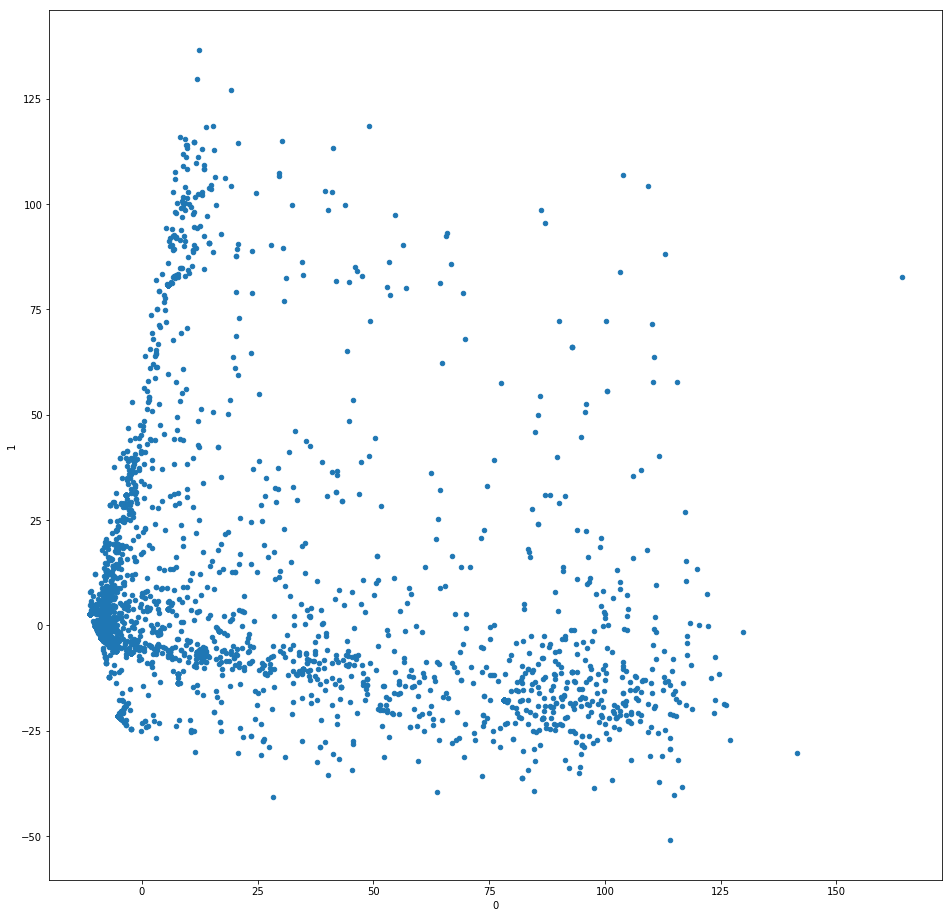

In [182]:
df.plot.scatter(x=0, y=1, figsize=(16, 16))

In [183]:
genres = {}
for tag in indexed_tags:
    genres[tag[0]] = [100 if x == tag[1] else 0 for x in range(n_tags)]

In [169]:
genres_pc = {k: model.transform([v]) for k, v in genres.items()}

In [170]:
print(genres_pc)

{'rock': array([[ 78.41691654, -17.27625707]]), 'pop': array([[  5.56716916,  81.53694213]]), 'alternative': array([[ 16.63661456,  -0.81585793]]), 'favorites': array([[-5.4890351 , -0.88523383]]), 'Love': array([[-5.28356809,  1.84798305]]), 'female vocalists': array([[ -3.38782698,  30.06361543]]), 'alternative rock': array([[ 11.98927056,  -5.98548625]]), 'indie': array([[ 5.71016543,  4.25736236]]), 'american': array([[-6.35834673, -0.77620558]]), 'classic rock': array([[  7.88743393, -11.59070912]]), '00s': array([[-5.95362059,  1.30508572]]), 'blues': array([[ -5.19893543, -23.48088791]]), 'hard rock': array([[  7.81265173, -13.48828841]]), 'dance': array([[ -7.78616867,  19.59739701]]), 'metal': array([[-5.64020307, -5.78471637]]), 'male vocalists': array([[-6.74735875, -0.75832812]]), 'electronic': array([[-7.92376436,  6.95795301]]), 'Awesome': array([[-7.19947943, -2.54850756]]), 'beautiful': array([[-7.118471 ,  0.0665001]]), '90s': array([[-3.44444248,  5.55145902]]), 'punk